In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
from itertools import product

In [2]:

# List of file paths for the data from 2005 to 2019
file_paths = [

    '/content/drive/MyDrive/Betting_data/2005.xls',
    '/content/drive/MyDrive/Betting_data/2006.xls',
    '/content/drive/MyDrive/Betting_data/2007.xls',
    '/content/drive/MyDrive/Betting_data/2008.xls',
    '/content/drive/MyDrive/Betting_data/2009.xls',
    '/content/drive/MyDrive/Betting_data/2010.xls',
    '/content/drive/MyDrive/Betting_data/2011.xls',
    '/content/drive/MyDrive/Betting_data/2012.xls',
    '/content/drive/MyDrive/Betting_data/2013.xlsx',
    '/content/drive/MyDrive/Betting_data/2014.xlsx',
    '/content/drive/MyDrive/Betting_data/2015.xlsx',
    '/content/drive/MyDrive/Betting_data/2016.xlsx',
    '/content/drive/MyDrive/Betting_data/2017.xlsx',
    '/content/drive/MyDrive/Betting_data/2018.xlsx',
    '/content/drive/MyDrive/Betting_data/2019.xlsx'
]

# Initializing an empty list to hold DataFrames
data_frames = []

# Loading data into a DataFrame
for file_path in file_paths:
    if os.path.exists(file_path):
        df = pd.read_excel(file_path)
        data_frames.append(df)
    else:
        print(f"File {file_path} not found.")

# Combining all the DataFrames into a single DataFrame
betting_df = pd.concat(data_frames, ignore_index=True)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# Converting 'Date' into a datetime object
betting_df["Date"] = pd.to_datetime(betting_df["Date"], errors='coerce')

# Select only the relevant columns
columns = [
    "Date",
    "Tournament",
    "Surface",
    "Winner",
    "Loser",
    "WRank",
    "WPts",
    "LRank",
    "LPts",
    "B365W",
    "B365L",
    "PSW",
    "PSL"
]
betting_df = betting_df[columns]

# Converting categorical columns to 'category' data type
categorical_columns = ["Tournament", "Surface"]
betting_df[categorical_columns] = betting_df[categorical_columns].astype("category")

# Handling missing values in 'WRank' and 'LRank'
betting_df["WRank"] = betting_df["WRank"].fillna(100000)
betting_df["LRank"] = betting_df["LRank"].fillna(100000)

# Handling missing values in 'WPts' and 'LPts' by imputing with the median
betting_df["WPts"] = betting_df["WPts"].fillna(betting_df["WPts"].median())
betting_df["LPts"] = betting_df["LPts"].fillna(betting_df["LPts"].median())

# Removing remaining NaN values
betting_df.dropna(inplace=True)

# Creating a higher-ranked player column
betting_df["higher_rank_won"] = betting_df["WRank"] < betting_df["LRank"]

# Calculating the difference in ranking points between the higher and lower-ranked players
betting_df["diff"] = (
    betting_df["WPts"] * betting_df["higher_rank_won"] +
    betting_df["LPts"] * (~betting_df["higher_rank_won"])
) - (
    betting_df["LPts"] * betting_df["higher_rank_won"] +
    betting_df["WPts"] * (~betting_df["higher_rank_won"])
)

# Print the last few rows of the DataFrame to verify the output
print(betting_df.tail())


            Date   Tournament Surface         Winner          Loser  WRank  \
40385 2019-11-15  Masters Cup    Hard      Nadal R.   Tsitsipas S.     1.0   
40386 2019-11-15  Masters Cup    Hard     Zverev A.    Medvedev D.     7.0   
40387 2019-11-16  Masters Cup    Hard  Tsitsipas S.     Federer R.     6.0   
40388 2019-11-16  Masters Cup    Hard      Thiem D.      Zverev A.     5.0   
40389 2019-11-17  Masters Cup    Hard  Tsitsipas S.       Thiem D.     6.0   

         WPts  LRank    LPts  B365W  B365L   PSW   PSL  higher_rank_won  \
40385  9585.0    6.0  4000.0   1.44   2.75  1.39  3.26             True   
40386  2945.0    4.0  5705.0   1.90   1.90  2.14  1.79            False   
40387  4000.0    3.0  6190.0   3.50   1.30  3.75  1.33            False   
40388  5025.0    7.0  2945.0   1.80   2.00  1.84  2.10             True   
40389  4000.0    5.0  5025.0   2.00   1.80  2.00  1.93            False   

         diff  
40385  5585.0  
40386  2760.0  
40387  2190.0  
40388  2080.0  


<ipython-input-3-688835687a87>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betting_df[categorical_columns] = betting_df[categorical_columns].astype("category")
<ipython-input-3-688835687a87>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betting_df["WRank"] = betting_df["WRank"].fillna(100000)
<ipython-input-3-688835687a87>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [4]:
# Split the data into training and testing sets based on date
split_date = pd.to_datetime("2019-01-01")
matches_train = betting_df[betting_df["Date"] < split_date]
matches_test = betting_df[betting_df["Date"] >= split_date]

# Prepare the features and target variable
X_train = matches_train[["diff"]]
y_train = matches_train["higher_rank_won"]
X_test = matches_test[["diff"]]
y_test = matches_test["higher_rank_won"]



In [5]:
# Define the initial Elo rating for all players
initial_elo = 1500

# Creating a set of unique player names from 'Winner' and 'Loser'
unique_player_names = set(matches_train["Winner"]).union(set(matches_train["Loser"]))

# Initialize the Elo ratings dictionary with the initial Elo score
elo_ratings = {player_name: initial_elo for player_name in unique_player_names}

# Initialize a dictionary to count the number of matches played by each player
matches_played = {player_name: 0 for player_name in unique_player_names}

# Parameters for the dynamic K-factor model
delta = 100
myu = 5
sigma = 0.1


In [6]:
# Function to calculate the dynamic K-factor based on matches played
def dynamic_k_factor(matches_played, delta=100, myu=5, sigma=0.1):
    return delta / ((matches_played + myu) ** sigma)

# Function to calculate expected probability based on Elo ratings
def calculate_EP(elo_1, elo_2):
    return 1 / (1 + 10 ** ((elo_2 - elo_1) / 400))

# Function to update Elo ratings based on match outcomes with a dynamic K-factor
def winner_update_elo(current_elo, expected_prob, actual_result, k_factor):
    return current_elo + k_factor * (actual_result - expected_prob)

def loser_update_elo(current_elo, expected_prob, actual_result, k_factor):
    return current_elo + k_factor * (actual_result - (1 - expected_prob))


In [7]:
# Update Elo ratings using the dynamic K-factor model
for index, row in matches_train.iterrows():
    winner_name = row["Winner"]
    loser_name = row["Loser"]

    # Ensure Elo ratings are initialized correctly to avoid KeyErrors
    if winner_name not in elo_ratings:
        elo_ratings[winner_name] = initial_elo
        matches_played[winner_name] = 0
    if loser_name not in elo_ratings:
        elo_ratings[loser_name] = initial_elo
        matches_played[winner_name] = 0

    winner_elo = elo_ratings[winner_name]
    loser_elo = elo_ratings[loser_name]

    expected_win_prob = calculate_EP(winner_elo, loser_elo)

    k_factor_winner = dynamic_k_factor(matches_played[winner_name], delta, myu, sigma)
    k_factor_loser = dynamic_k_factor(matches_played[loser_name], delta, myu, sigma)

    elo_ratings[winner_name] = winner_update_elo(winner_elo, expected_win_prob, 1, k_factor_winner)
    elo_ratings[loser_name] = loser_update_elo(loser_elo, expected_win_prob, 0, k_factor_loser)

    # Increment the count of matches played for each player
    matches_played[winner_name] += 1
    matches_played[loser_name] += 1


In [8]:
# Ensure all players in the test set are also included in the dictionaries
for index, row in matches_test.iterrows():
    winner_name = row["Winner"]
    loser_name = row["Loser"]

    if winner_name not in elo_ratings:
        elo_ratings[winner_name] = initial_elo
        matches_played[winner_name] = 0

    if loser_name not in elo_ratings:
        elo_ratings[loser_name] = initial_elo
        matches_played[loser_name] = 0

# Calculate expected probabilities for the testing set based on the dynamic K-factor model
expected_prob_test, expected_outcome_test = [], []

for index, row in matches_test.iterrows():
    winner_name = row["Winner"]
    loser_name = row["Loser"]

    winner_elo = elo_ratings[winner_name]
    loser_elo = elo_ratings[loser_name]

    # Calculate expected probability of the winner defeating the loser
    expected_win_prob = calculate_EP(winner_elo, loser_elo)

    k_factor_winner = dynamic_k_factor(matches_played[winner_name], delta, myu, sigma)
    k_factor_loser = dynamic_k_factor(matches_played[loser_name], delta, myu, sigma)

    elo_ratings[winner_name] = winner_update_elo(winner_elo, expected_win_prob, 1, k_factor_winner)
    elo_ratings[loser_name] = loser_update_elo(loser_elo, expected_win_prob, 0, k_factor_loser)

    # Increment the count of matches played for each player
    matches_played[winner_name] += 1
    matches_played[loser_name] += 1


    if row["higher_rank_won"] == 1:
        expected_prob_test.append(expected_win_prob)
        expected_outcome_test.append(int(expected_win_prob > 0.5))
    else:
        expected_prob_test.append(1 - expected_win_prob)
        expected_outcome_test.append(int((1 - expected_win_prob) > 0.5))


In [9]:
# Prepare the actual results for the test set
y_test = matches_test["higher_rank_won"].apply(lambda x: 1 if x else 0)  # Ensuring binary labels

# Evaluate the ELO model
elo_accuracy = accuracy_score(y_test, expected_outcome_test)
elo_log_loss = log_loss(y_test, expected_prob_test)
elo_calibration = np.sum(expected_prob_test) / np.sum(y_test)

# Print results
print(f"Elo Model Accuracy: {elo_accuracy}")
print(f"Elo Model Log Loss: {elo_log_loss}")
print(f"Elo Model Calibration: {elo_calibration}")

# Add ELO model results to validation stats
validation_stats = pd.DataFrame({
    "model": ["elo_dynamic_k"],
    "accuracy": [elo_accuracy],
    "calibration": [elo_calibration],
    "log_loss": [elo_log_loss]
})

print(validation_stats)


Elo Model Accuracy: 0.6328034121752617
Elo Model Log Loss: 0.6494896242674353
Elo Model Calibration: 1.061758126444547
           model  accuracy  calibration  log_loss
0  elo_dynamic_k  0.632803     1.061758   0.64949


# Optimizing the Model

In [10]:
# Define the initial Elo rating for all players
initial_elo = 1500

# Creating a set of unique player names from 'Winner' and 'Loser'
unique_player_names = set(matches_train["Winner"]).union(set(matches_train["Loser"]))


In [11]:
def evaluate_elo_model_dynamic(delta, myu, sigma):
    # Initialize Elo ratings and matches played dictionaries
    elo_ratings = {player_name: initial_elo for player_name in unique_player_names}
    matches_played = {player_name: 0 for player_name in unique_player_names}

    # Function to calculate the dynamic K-factor based on matches played
    def dynamic_k_factor(matches_played, delta=100, myu=5, sigma=0.1):
        return delta / ((matches_played + myu) ** sigma)

    # Update Elo ratings using the dynamic K-factor model
    for index, row in matches_train.iterrows():
        winner_name = row["Winner"]
        loser_name = row["Loser"]

        if winner_name not in elo_ratings:
            elo_ratings[winner_name] = initial_elo
            matches_played[winner_name] = 0
        if loser_name not in elo_ratings:
            elo_ratings[loser_name] = initial_elo
            matches_played[loser_name] = 0

        winner_elo = elo_ratings[winner_name]
        loser_elo = elo_ratings[loser_name]

        expected_win_prob = calculate_EP(winner_elo, loser_elo)

        k_factor_winner = dynamic_k_factor(matches_played[winner_name], delta, myu, sigma)
        k_factor_loser = dynamic_k_factor(matches_played[loser_name], delta, myu, sigma)

        elo_ratings[winner_name] = winner_update_elo(winner_elo, expected_win_prob, 1, k_factor_winner)
        elo_ratings[loser_name] = loser_update_elo(loser_elo, expected_win_prob, 0, k_factor_loser)

        # Increment the count of matches played for each player
        matches_played[winner_name] += 1
        matches_played[loser_name] += 1

    # Ensure all players in the test set are also included in the dictionaries
    for index, row in matches_test.iterrows():
        winner_name = row["Winner"]
        loser_name = row["Loser"]

        if winner_name not in elo_ratings:
            elo_ratings[winner_name] = initial_elo
            matches_played[winner_name] = 0

        if loser_name not in elo_ratings:
            elo_ratings[loser_name] = initial_elo
            matches_played[loser_name] = 0

    # Calculate expected probabilities for the testing set
    expected_prob_test, expected_outcome_test = [], []

    for index, row in matches_test.iterrows():
        winner_name = row["Winner"]
        loser_name = row["Loser"]

        winner_elo = elo_ratings[winner_name]
        loser_elo = elo_ratings[loser_name]

        expected_win_prob = calculate_EP(winner_elo, loser_elo)

        k_factor_winner = dynamic_k_factor(matches_played[winner_name], delta, myu, sigma)
        k_factor_loser = dynamic_k_factor(matches_played[loser_name], delta, myu, sigma)

        elo_ratings[winner_name] = winner_update_elo(winner_elo, expected_win_prob, 1, k_factor_winner)
        elo_ratings[loser_name] = loser_update_elo(loser_elo, expected_win_prob, 0, k_factor_loser)

        if row["higher_rank_won"] == 1:
            expected_prob_test.append(expected_win_prob)
            expected_outcome_test.append(int(expected_win_prob > 0.5))
        else:
            expected_prob_test.append(1 - expected_win_prob)
            expected_outcome_test.append(int((1 - expected_win_prob) > 0.5))

    y_test = matches_test["higher_rank_won"].apply(lambda x: 1 if x else 0)  # Ensuring binary labels

    # Evaluate the ELO model
    elo_accuracy = accuracy_score(y_test, expected_outcome_test)
    elo_log_loss = log_loss(y_test, expected_prob_test)
    elo_calibration = np.sum(expected_prob_test) / np.sum(y_test)

    return elo_accuracy, elo_log_loss, elo_calibration


In [12]:
# Define the range of values for delta, myu, and sigma
delta_values = [50, 100, 150]
myu_values = [2, 5, 10]
sigma_values = [0.05, 0.1, 0.15]

# Store results
results = []

# Perform grid search over the parameter combinations
for delta, myu, sigma in product(delta_values, myu_values, sigma_values):
    accuracy, log_loss_value, calibration = evaluate_elo_model_dynamic(delta, myu, sigma)
    results.append({
        "delta": delta,
        "myu": myu,
        "sigma": sigma,
        "accuracy": accuracy,
        "log_loss": log_loss_value,
        "calibration": calibration
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Find the best parameter combination based on the desired metric
best_result = results_df.loc[results_df["accuracy"].idxmax()]

print("Best Parameters based on log_loss:")
print(best_result)


Best Parameters based on log_loss:
delta          100.000000
myu             10.000000
sigma            0.150000
accuracy         0.637844
log_loss         0.641814
calibration      1.057488
Name: 17, dtype: float64


In [13]:
best_delta = best_result["delta"]
best_myu = best_result["myu"]
best_sigma = best_result["sigma"]

best_accuracy, best_log_loss, best_calibration = evaluate_elo_model_dynamic(best_delta, best_myu, best_sigma)

# Print final model evaluation with the best parameters
print(f"Best Parameters - delta: {best_delta}, myu: {best_myu}, sigma: {best_sigma}")
print(f"Final Elo Model Accuracy: {best_accuracy}")
print(f"Final Elo Model Log Loss: {best_log_loss}")
print(f"Final Elo Model Calibration: {best_calibration}")

Best Parameters - delta: 100.0, myu: 10.0, sigma: 0.15
Final Elo Model Accuracy: 0.6378441256300892
Final Elo Model Log Loss: 0.6418137316901261
Final Elo Model Calibration: 1.057488006196101


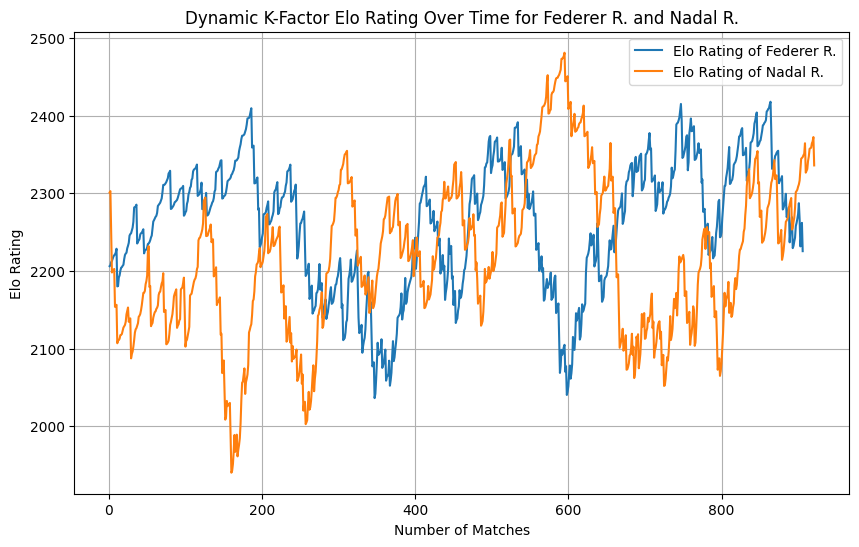

In [14]:
import matplotlib.pyplot as plt

# Define the player names
player_1 = "Federer R."
player_2 = "Nadal R."

# Lists to store Elo ratings over time for each player
player_1_elo_over_time = []
player_2_elo_over_time = []

# Lists to store the match number for each player
player_1_match_numbers = []
player_2_match_numbers = []

# Initialize match counters
match_count_1 = 0
match_count_2 = 0

# Update Elo ratings using the dynamic K-factor model
for index, row in matches_train.iterrows():
    winner_name = row["Winner"]
    loser_name = row["Loser"]

    winner_elo = elo_ratings[winner_name]
    loser_elo = elo_ratings[loser_name]

    expected_win_prob = calculate_EP(winner_elo, loser_elo)

    k_factor_winner = dynamic_k_factor(matches_played[winner_name], delta, myu, sigma)
    k_factor_loser = dynamic_k_factor(matches_played[loser_name], delta, myu, sigma)

    elo_ratings[winner_name] = winner_update_elo(winner_elo, expected_win_prob, 1, k_factor_winner)
    elo_ratings[loser_name] = loser_update_elo(loser_elo, expected_win_prob, 0, k_factor_loser)

    # Increment the count of matches played for each player
    matches_played[winner_name] += 1
    matches_played[loser_name] += 1

    # Track Elo ratings over time for the two specific players
    if winner_name == player_1 or loser_name == player_1:
        match_count_1 += 1
        player_1_elo_over_time.append(elo_ratings[player_1])
        player_1_match_numbers.append(match_count_1)

    if winner_name == player_2 or loser_name == player_2:
        match_count_2 += 1
        player_2_elo_over_time.append(elo_ratings[player_2])
        player_2_match_numbers.append(match_count_2)

# Plotting the Elo ratings over time for both players
plt.figure(figsize=(10, 6))
plt.plot(player_1_match_numbers, player_1_elo_over_time, label=f"Elo Rating of {player_1}")
plt.plot(player_2_match_numbers, player_2_elo_over_time, label=f"Elo Rating of {player_2}")

plt.xlabel("Number of Matches")
plt.ylabel("Elo Rating")
plt.title(f"Dynamic K-Factor Elo Rating Over Time for {player_1} and {player_2}")
plt.legend()
plt.grid(True)
plt.show()


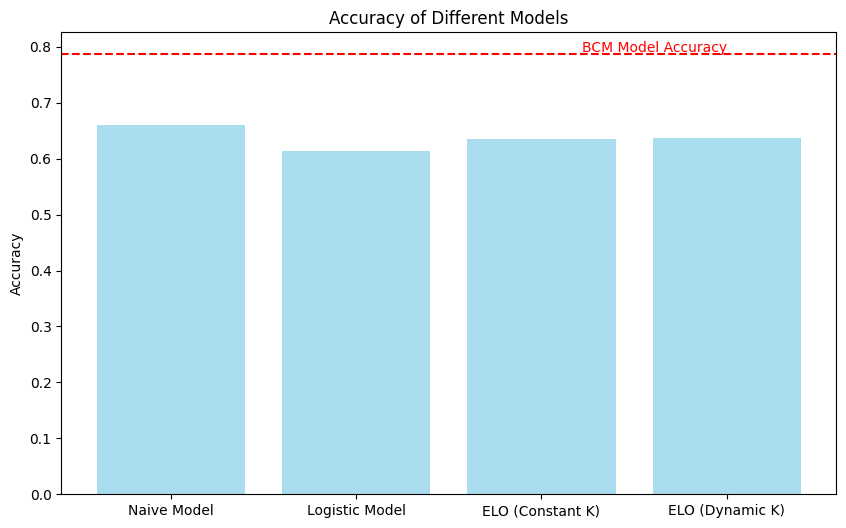

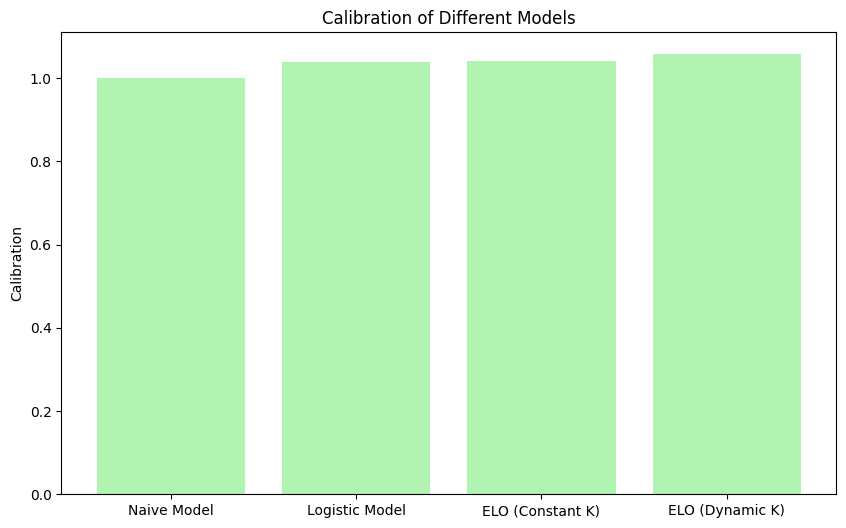

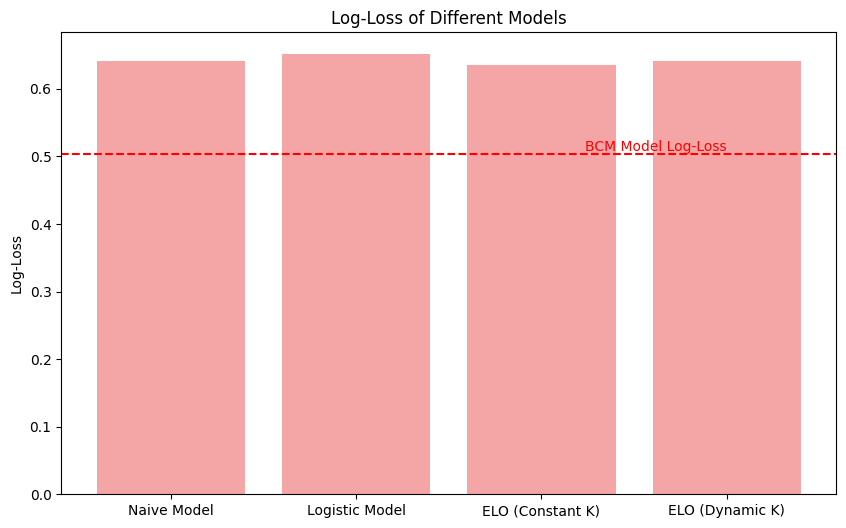

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics for each model
models = ['Naive Model', 'Logistic Model', 'ELO (Constant K)', 'ELO (Dynamic K)']
accuracy = [0.6599, 0.6146, 0.6347, 0.6378]
calibration = [1.0000, 1.0384, 1.0410, 1.0575]
log_loss = [0.6411, 0.6512, 0.6347, 0.6418]

# BCM Model metrics for reference
bcm_accuracy = 0.7867
bcm_log_loss = 0.5032

# Plot for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue', alpha=0.7)
plt.axhline(y=bcm_accuracy, color='red', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.text(len(models) - 1, bcm_accuracy + 0.005, 'BCM Model Accuracy', color='red', ha='right')
plt.show()

# Plot for Calibration
plt.figure(figsize=(10, 6))
plt.bar(models, calibration, color='lightgreen', alpha=0.7)
plt.ylabel('Calibration')
plt.title('Calibration of Different Models')
plt.show()

# Plot for Log-Loss
plt.figure(figsize=(10, 6))
plt.bar(models, log_loss, color='lightcoral', alpha=0.7)
plt.axhline(y=bcm_log_loss, color='red', linestyle='--')
plt.ylabel('Log-Loss')
plt.title('Log-Loss of Different Models')
plt.text(len(models) - 1, bcm_log_loss + 0.005, 'BCM Model Log-Loss', color='red', ha='right')
plt.show()
